In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from io import StringIO
from astropy.io import fits
from matplotlib import cm

In [40]:
with open('/Users/natachaupra/Desktop/Snr_Prj/Snr-Prj-Actual/wyle0112-hS_N_.txt','r') as data :
    sample = data.read()
    
data.close()

In [41]:
drpall_list = fits.open("/Users/natachaupra/Desktop/Snr_Prj/Snr-Prj-Actual/platelist-v2_4_3.fits")

In [42]:
table_data = StringIO(sample)

In [43]:
# convert txt to csv and make dataframe
df = pd.read_csv(table_data, sep=',')

In [44]:
df

,mangaid,ra,dec,nsa_z,frac_spx,flag1,flag2
0,1-113521,317.38870,11.502920,0.135043,0.084025,False,0
1,1-113675,318.77560,10.098460,0.129881,0.146067,False,0
2,1-121532,118.09110,34.326570,0.139965,0.368421,True,4
3,1-121737,118.29130,35.932520,0.113369,1.055877,False,0
4,1-149270,168.30090,50.264590,0.115761,0.997324,False,0
5,1-156039,143.94070,49.023210,0.114699,1.033171,False,0
6,1-156158,144.47600,50.989100,0.138619,0.157040,False,0
7,1-167519,153.91470,44.656870,0.112397,0.644802,False,0
8,1-173904,166.15800,49.675790,0.114195,1.051478,False,0
9,1-180298,322.25310,0.182614,0.133437,0.005000,False,0


In [45]:
mangaid = np.array(df[[df.columns[0]]])

In [46]:
mangaid.flatten();
len(mangaid)

45

In [47]:
objlist = drpall_list[2].data

In [48]:
# Compare mangaid to from drp with sample list to get plateifu 

plateifu = {}
lst = []
for i in range(len(objlist)):
    if objlist[i][3] in mangaid:
        if objlist[i][3] in plateifu:
            plateifu[objlist[i][3]].append(objlist[i][2])
        else:
            plateifu[objlist[i][3]] = [objlist[i][2]]

In [91]:
# plateifu

# And there are no more duplicates --> What a win !

In [54]:
def filename(plateifu_id):
    objname = 'manga-'+plateifu_id+'-LOGCUBE.fits.gz'
    name = '/Volumes/WD_External/MaNGA_Sample_with_[OIII]/'+objname
    filedata = fits.open(name)
    return filedata

In [114]:
def imageGenerator(plateifu_id, mangaID, redshift):
    data = filename(plateifu_id)
    flux = np.transpose(data['FLUX'].data, axes=(2, 1, 0))
    mask = np.transpose(data['MASK'].data, axes=(2, 1, 0))
    wave = data['WAVE'].data
    flux_header  = data['FLUX'].header
    
    x_center = int(flux_header['CRPIX1']) - 1
    y_center = int(flux_header['CRPIX2']) - 1

    do_not_use = (mask & 2**10) != 0
    flux_m = np.ma.array(flux, mask=do_not_use)

    redshift = 0.131681
    ind_wave = np.where((wave / (1 + redshift) > 4900) & (wave / (1 + redshift) < 5100))[0]
    halpha = flux_m[:, :, ind_wave].sum(axis=2)
    im = halpha.T

    # Convert from array indices to arcsec relative to IFU center
    dx = flux_header['CD1_1'] * 3600.  # deg to arcsec
    dy = flux_header['CD2_2'] * 3600.  # deg to arcsec

    dimension = [0, len(flux[0]), 0, len(flux)]
    
    plt.figure(figsize = (5,5))
    plt.imshow(im, extent=dimension, cmap=cm.YlGnBu_r, vmin=0.1, vmax=100, origin='lower', interpolation='none')
    plt.xlabel('pixels')
    plt.ylabel('pixels')
    plt.title('MaNGA ID = ' + mangaID)
    plt.plot()

CPU times: user 2.05 s, sys: 38.5 ms, total: 2.09 s
Wall time: 2.82 s


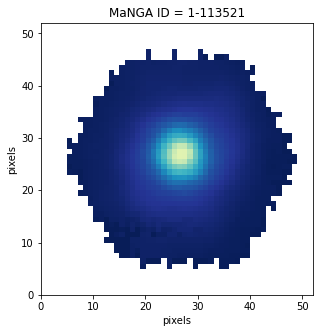

In [129]:
%%time
num = 0
imageGenerator(plateifu[df.loc[[num]]['mangaid'][num]][0], df.loc[[num]]['mangaid'][num] 
               ,df.loc[[num]]['nsa_z'][num])

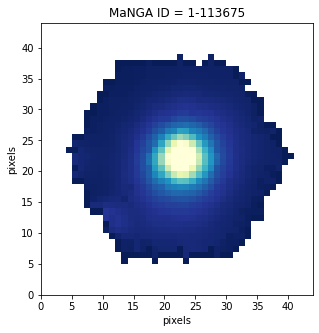

In [130]:
num = 1
imageGenerator(plateifu[df.loc[[num]]['mangaid'][num]][0], df.loc[[num]]['mangaid'][num] 
               ,df.loc[[num]]['nsa_z'][num])

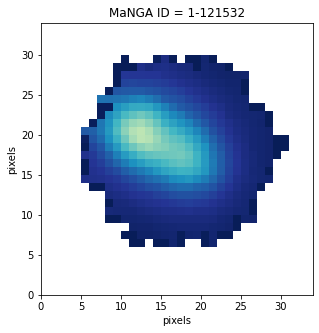

In [131]:
num = 2
imageGenerator(plateifu[df.loc[[num]]['mangaid'][num]][0], df.loc[[num]]['mangaid'][num] 
               ,df.loc[[num]]['nsa_z'][num])

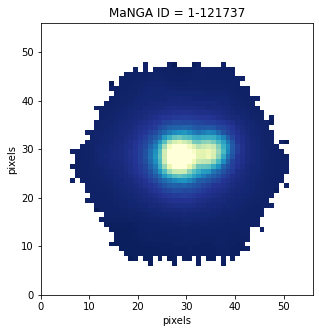

In [132]:
num = 3
imageGenerator(plateifu[df.loc[[num]]['mangaid'][num]][0], df.loc[[num]]['mangaid'][num] 
               ,df.loc[[num]]['nsa_z'][num])

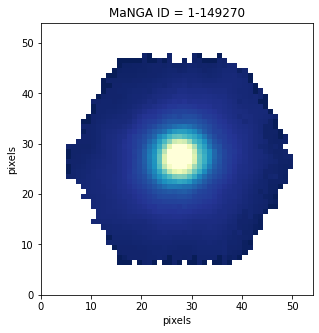

In [133]:
num = 4
imageGenerator(plateifu[df.loc[[num]]['mangaid'][num]][0], df.loc[[num]]['mangaid'][num] 
               ,df.loc[[num]]['nsa_z'][num])

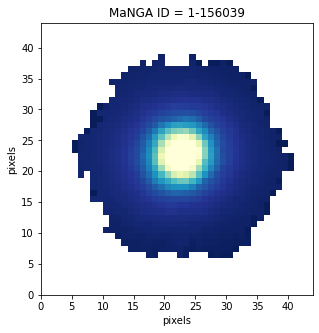

In [134]:
num = 5
imageGenerator(plateifu[df.loc[[num]]['mangaid'][num]][0], df.loc[[num]]['mangaid'][num] 
               ,df.loc[[num]]['nsa_z'][num])

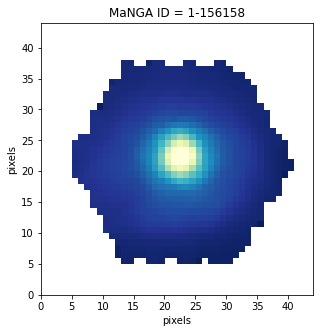

In [135]:
num = 6
imageGenerator(plateifu[df.loc[[num]]['mangaid'][num]][0], df.loc[[num]]['mangaid'][num] 
               ,df.loc[[num]]['nsa_z'][num])

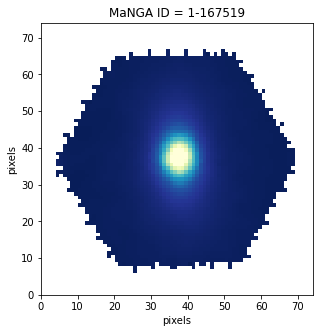

In [136]:
num = 7
imageGenerator(plateifu[df.loc[[num]]['mangaid'][num]][0], df.loc[[num]]['mangaid'][num] 
               ,df.loc[[num]]['nsa_z'][num])

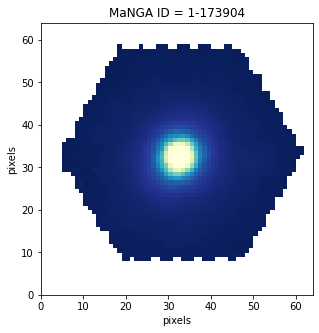

In [137]:
num = 8
imageGenerator(plateifu[df.loc[[num]]['mangaid'][num]][0], df.loc[[num]]['mangaid'][num] 
               ,df.loc[[num]]['nsa_z'][num])

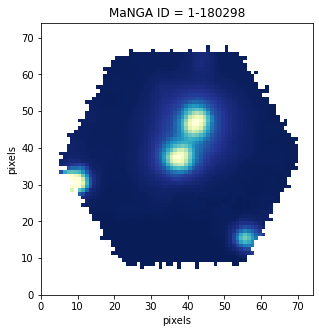

In [138]:
num = 9
imageGenerator(plateifu[df.loc[[num]]['mangaid'][num]][0], df.loc[[num]]['mangaid'][num] 
               ,df.loc[[num]]['nsa_z'][num])

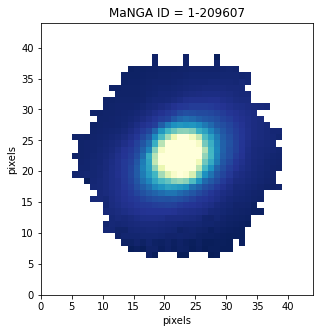

In [139]:
num = 10
imageGenerator(plateifu[df.loc[[num]]['mangaid'][num]][0], df.loc[[num]]['mangaid'][num] 
               ,df.loc[[num]]['nsa_z'][num])

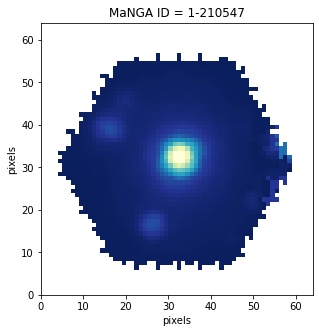

In [140]:
num = 11
imageGenerator(plateifu[df.loc[[num]]['mangaid'][num]][0], df.loc[[num]]['mangaid'][num] 
               ,df.loc[[num]]['nsa_z'][num])

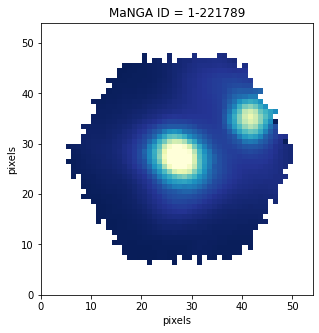

In [141]:
num = 12
imageGenerator(plateifu[df.loc[[num]]['mangaid'][num]][0], df.loc[[num]]['mangaid'][num] 
               ,df.loc[[num]]['nsa_z'][num])

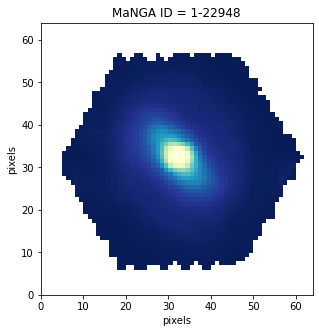

In [142]:
num = 13
imageGenerator(plateifu[df.loc[[num]]['mangaid'][num]][0], df.loc[[num]]['mangaid'][num] 
               ,df.loc[[num]]['nsa_z'][num])

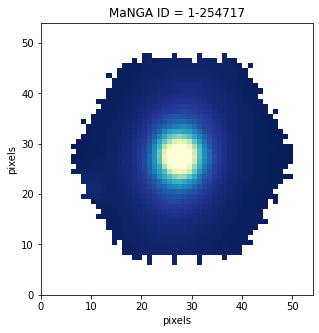

In [143]:
num = 14
imageGenerator(plateifu[df.loc[[num]]['mangaid'][num]][0], df.loc[[num]]['mangaid'][num] 
               ,df.loc[[num]]['nsa_z'][num])

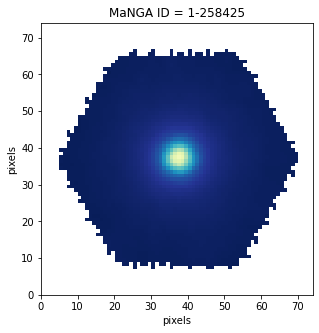

In [144]:
num = 15
imageGenerator(plateifu[df.loc[[num]]['mangaid'][num]][0], df.loc[[num]]['mangaid'][num] 
               ,df.loc[[num]]['nsa_z'][num])

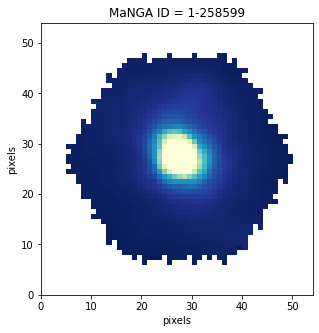

In [145]:
num = 16
imageGenerator(plateifu[df.loc[[num]]['mangaid'][num]][0], df.loc[[num]]['mangaid'][num] 
               ,df.loc[[num]]['nsa_z'][num])

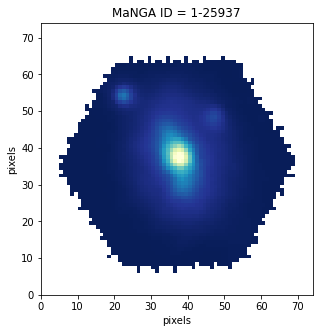

In [146]:
num = 17
imageGenerator(plateifu[df.loc[[num]]['mangaid'][num]][0], df.loc[[num]]['mangaid'][num] 
               ,df.loc[[num]]['nsa_z'][num])

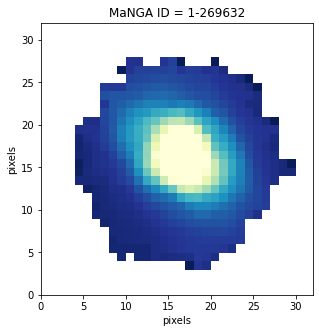

In [147]:
num = 18
imageGenerator(plateifu[df.loc[[num]]['mangaid'][num]][0], df.loc[[num]]['mangaid'][num] 
               ,df.loc[[num]]['nsa_z'][num])

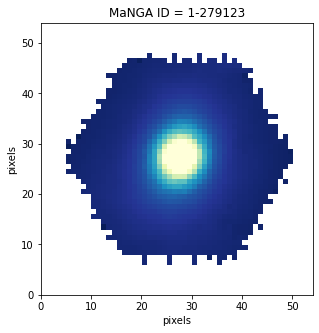

In [148]:
num = 19
imageGenerator(plateifu[df.loc[[num]]['mangaid'][num]][0], df.loc[[num]]['mangaid'][num] 
               ,df.loc[[num]]['nsa_z'][num])

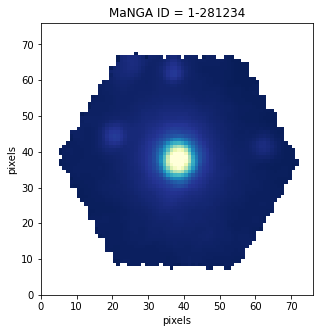

In [149]:
num = 20
imageGenerator(plateifu[df.loc[[num]]['mangaid'][num]][0], df.loc[[num]]['mangaid'][num] 
               ,df.loc[[num]]['nsa_z'][num])

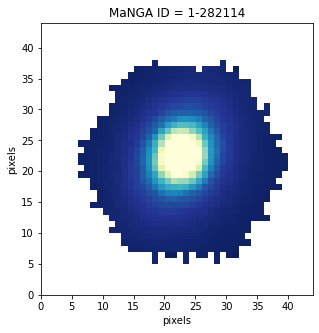

In [150]:
num = 21
imageGenerator(plateifu[df.loc[[num]]['mangaid'][num]][0], df.loc[[num]]['mangaid'][num] 
               ,df.loc[[num]]['nsa_z'][num])

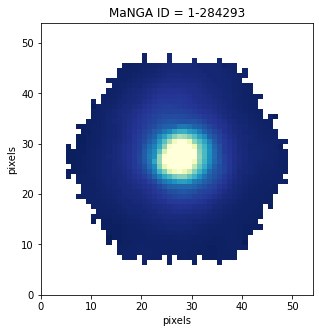

In [151]:
num = 22
imageGenerator(plateifu[df.loc[[num]]['mangaid'][num]][0], df.loc[[num]]['mangaid'][num] 
               ,df.loc[[num]]['nsa_z'][num])

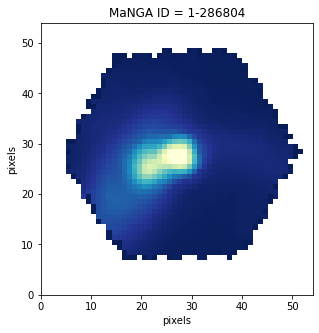

In [152]:
num = 23
imageGenerator(plateifu[df.loc[[num]]['mangaid'][num]][0], df.loc[[num]]['mangaid'][num] 
               ,df.loc[[num]]['nsa_z'][num])

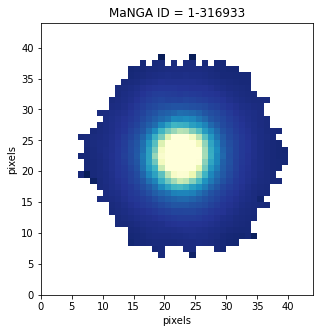

In [153]:
num = 24
imageGenerator(plateifu[df.loc[[num]]['mangaid'][num]][0], df.loc[[num]]['mangaid'][num] 
               ,df.loc[[num]]['nsa_z'][num])

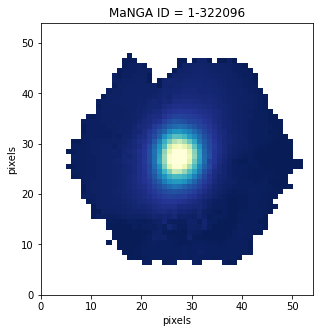

In [154]:
num = 25
imageGenerator(plateifu[df.loc[[num]]['mangaid'][num]][0], df.loc[[num]]['mangaid'][num] 
               ,df.loc[[num]]['nsa_z'][num])

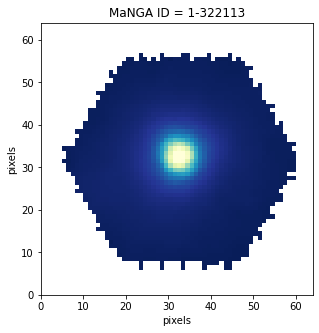

In [155]:
num = 26
imageGenerator(plateifu[df.loc[[num]]['mangaid'][num]][0], df.loc[[num]]['mangaid'][num] 
               ,df.loc[[num]]['nsa_z'][num])

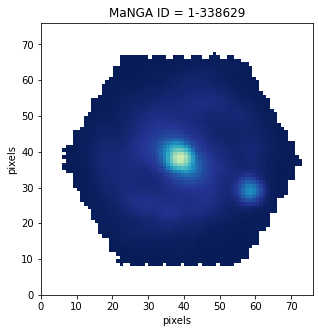

In [156]:
num = 27
imageGenerator(plateifu[df.loc[[num]]['mangaid'][num]][0], df.loc[[num]]['mangaid'][num] 
               ,df.loc[[num]]['nsa_z'][num])

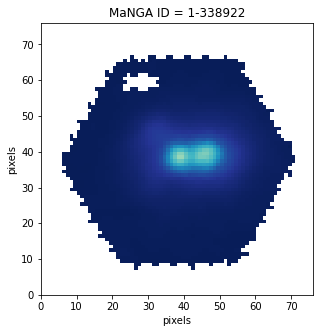

In [157]:
num = 28
imageGenerator(plateifu[df.loc[[num]]['mangaid'][num]][0], df.loc[[num]]['mangaid'][num] 
               ,df.loc[[num]]['nsa_z'][num])

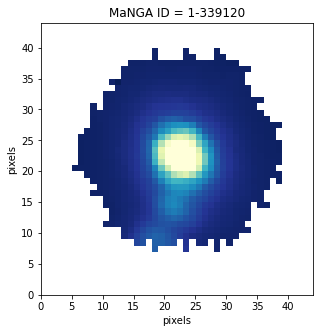

In [158]:
num = 29
imageGenerator(plateifu[df.loc[[num]]['mangaid'][num]][0], df.loc[[num]]['mangaid'][num] 
               ,df.loc[[num]]['nsa_z'][num])

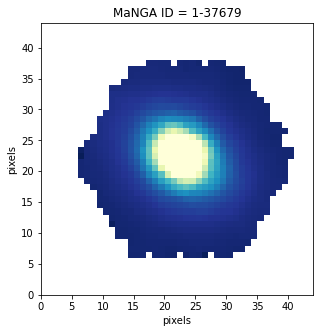

In [159]:
num = 30
imageGenerator(plateifu[df.loc[[num]]['mangaid'][num]][0], df.loc[[num]]['mangaid'][num] 
               ,df.loc[[num]]['nsa_z'][num])

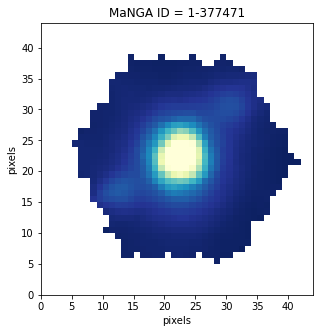

In [160]:
num = 31
imageGenerator(plateifu[df.loc[[num]]['mangaid'][num]][0], df.loc[[num]]['mangaid'][num] 
               ,df.loc[[num]]['nsa_z'][num])

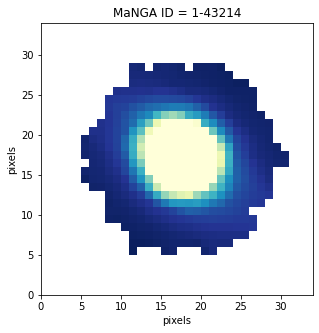

In [161]:
num = 32
imageGenerator(plateifu[df.loc[[num]]['mangaid'][num]][0], df.loc[[num]]['mangaid'][num] 
               ,df.loc[[num]]['nsa_z'][num])

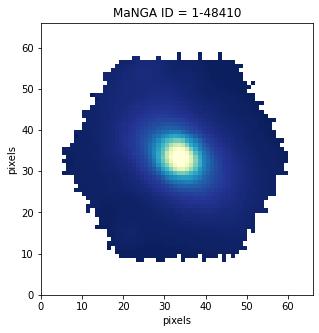

In [162]:
num = 33
imageGenerator(plateifu[df.loc[[num]]['mangaid'][num]][0], df.loc[[num]]['mangaid'][num] 
               ,df.loc[[num]]['nsa_z'][num])

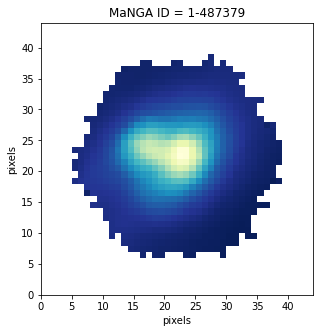

In [163]:
num = 34
imageGenerator(plateifu[df.loc[[num]]['mangaid'][num]][0], df.loc[[num]]['mangaid'][num] 
               ,df.loc[[num]]['nsa_z'][num])

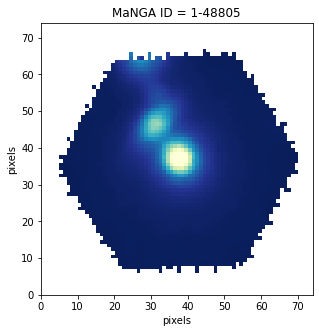

In [164]:
num = 35
imageGenerator(plateifu[df.loc[[num]]['mangaid'][num]][0], df.loc[[num]]['mangaid'][num] 
               ,df.loc[[num]]['nsa_z'][num])

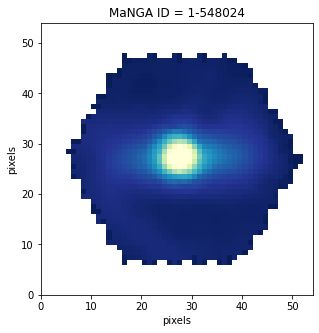

In [165]:
num = 36
imageGenerator(plateifu[df.loc[[num]]['mangaid'][num]][0], df.loc[[num]]['mangaid'][num] 
               ,df.loc[[num]]['nsa_z'][num])

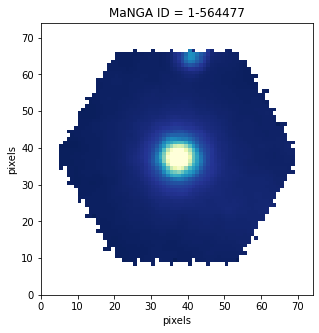

In [166]:
num = 37
imageGenerator(plateifu[df.loc[[num]]['mangaid'][num]][0], df.loc[[num]]['mangaid'][num] 
               ,df.loc[[num]]['nsa_z'][num])

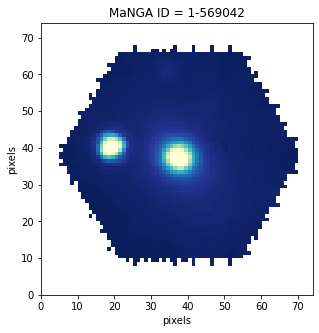

In [167]:
num = 38
imageGenerator(plateifu[df.loc[[num]]['mangaid'][num]][0], df.loc[[num]]['mangaid'][num] 
               ,df.loc[[num]]['nsa_z'][num])

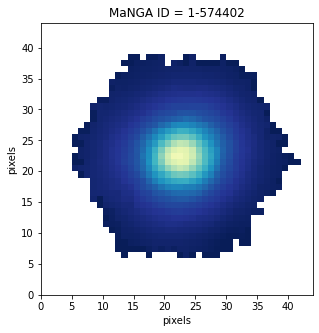

In [168]:
num = 39
imageGenerator(plateifu[df.loc[[num]]['mangaid'][num]][0], df.loc[[num]]['mangaid'][num] 
               ,df.loc[[num]]['nsa_z'][num])

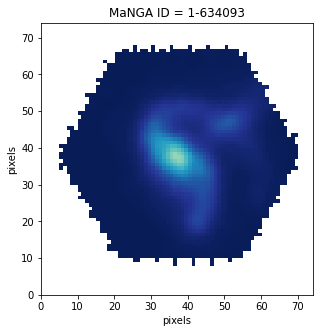

In [169]:
num = 40
imageGenerator(plateifu[df.loc[[num]]['mangaid'][num]][0], df.loc[[num]]['mangaid'][num] 
               ,df.loc[[num]]['nsa_z'][num])

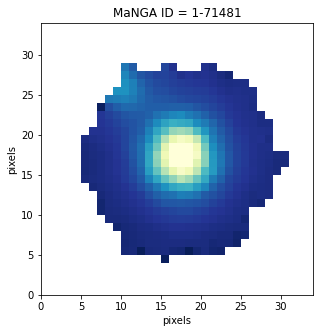

In [170]:
num = 41
imageGenerator(plateifu[df.loc[[num]]['mangaid'][num]][0], df.loc[[num]]['mangaid'][num] 
               ,df.loc[[num]]['nsa_z'][num])

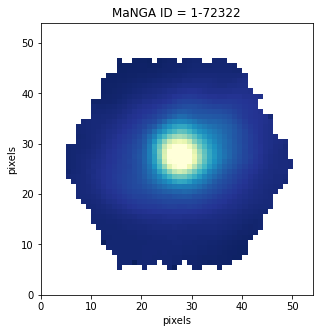

In [171]:
num = 42
imageGenerator(plateifu[df.loc[[num]]['mangaid'][num]][0], df.loc[[num]]['mangaid'][num] 
               ,df.loc[[num]]['nsa_z'][num])

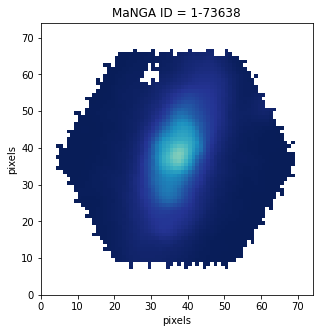

In [172]:
num = 43
imageGenerator(plateifu[df.loc[[num]]['mangaid'][num]][0], df.loc[[num]]['mangaid'][num] 
               ,df.loc[[num]]['nsa_z'][num])

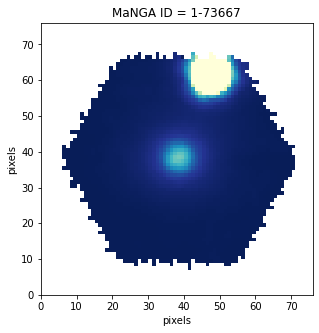

In [173]:
num = 44
imageGenerator(plateifu[df.loc[[num]]['mangaid'][num]][0], df.loc[[num]]['mangaid'][num] 
               ,df.loc[[num]]['nsa_z'][num])